<a href="https://colab.research.google.com/github/shrisrivas/Project_CV_Cat-Dog_Images/blob/main/Cat_Dog_by_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 using Keras

In [56]:
!nvidia-smi

Mon Mar 13 12:27:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |    587MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [57]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [58]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
ROOT_PATH = '/content/drive/MyDrive/project_catdog'

In [61]:
!pwd

/content/drive/My Drive/project_catdog


In [62]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/project_catdog'

In [63]:
!ls

train  validation


In [64]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'project_catdog/train'
valid_path = 'project_catdog/validation'


In [65]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [66]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

In [67]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [68]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [69]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [70]:
  # useful for getting number of output classes
folder = glob('train/*')

In [71]:
folder

['train/Dog', 'train/Cat']

In [72]:
len(folder)

2

In [73]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [74]:
# view the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [75]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [76]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [77]:
!pwd

/content/drive/MyDrive/project_catdog


In [79]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 337 images belonging to 2 classes.


In [80]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 59 images belonging to 2 classes.


In [81]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
11/11 [==============================] - 56s 4s/step - loss: 3.2691 - accuracy: 0.4866 - val_loss: 0.8101 - val_accuracy: 0.5254
Epoch 2/10
11/11 [==============================] - 6s 591ms/step - loss: 0.4973 - accuracy: 0.7418 - val_loss: 0.5030 - val_accuracy: 0.7627
Epoch 3/10
11/11 [==============================] - 5s 482ms/step - loss: 0.2423 - accuracy: 0.9139 - val_loss: 0.3623 - val_accuracy: 0.8475
Epoch 4/10
11/11 [==============================] - 6s 561ms/step - loss: 0.1818 - accuracy: 0.9525 - val_loss: 0.3448 - val_accuracy: 0.8475
Epoch 5/10
11/11 [==============================] - 5s 474ms/step - loss: 0.1425 - accuracy: 0.9407 - val_loss: 0.3751 - val_accuracy: 0.8305
Epoch 6/10
11/11 [==============================] - 6s 508ms/step - loss: 0.1088 - accuracy: 0.9674 - val_loss: 0.4009 - val_accuracy: 0.8136
Epoch 7/10
11/11 [==============================] - 6s 542ms/step - loss: 0.0849 - accuracy: 0.9733 - val_loss: 0.4181 - val_accuracy: 0.8305
Epoch 8/

In [82]:
import matplotlib.pyplot as plt

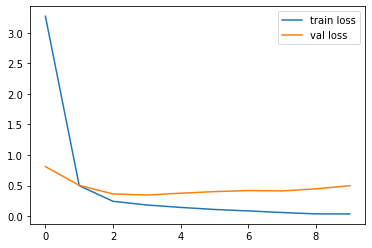

<Figure size 432x288 with 0 Axes>

In [83]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

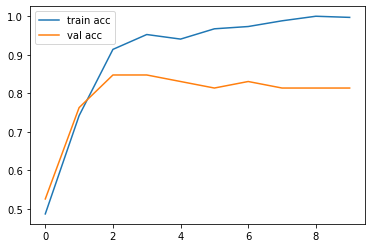

<Figure size 432x288 with 0 Axes>

In [84]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [85]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [86]:
y_pred = model.predict(test_set)

2/2 [==============================] - 0s 148ms/step


In [87]:
y_pred

array([[1.01244524e-01, 8.98755491e-01],
       [6.00268140e-06, 9.99994040e-01],
       [9.27995741e-01, 7.20042661e-02],
       [9.99833226e-01, 1.66721438e-04],
       [9.96979773e-01, 3.02017853e-03],
       [3.63293756e-03, 9.96367097e-01],
       [9.99310613e-01, 6.89336506e-04],
       [5.48458882e-02, 9.45154130e-01],
       [1.28399261e-04, 9.99871612e-01],
       [9.96756852e-01, 3.24313389e-03],
       [2.96192378e-01, 7.03807652e-01],
       [7.49247193e-01, 2.50752836e-01],
       [7.08473322e-04, 9.99291539e-01],
       [2.73174886e-03, 9.97268319e-01],
       [8.62443089e-01, 1.37556940e-01],
       [9.76719618e-01, 2.32804082e-02],
       [1.54164518e-04, 9.99845862e-01],
       [8.30138266e-01, 1.69861719e-01],
       [1.70368435e-06, 9.99998331e-01],
       [9.31253016e-01, 6.87470362e-02],
       [9.87443030e-01, 1.25569711e-02],
       [6.48491904e-02, 9.35150862e-01],
       [8.92555062e-03, 9.91074502e-01],
       [9.96861219e-01, 3.13875405e-03],
       [2.140804

In [88]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [89]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [90]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [91]:
model=load_model('model_vgg16.h5')

In [92]:
img=image.load_img('cat.jpg',target_size=(224,224))

FileNotFoundError: ignored

In [93]:
x=image.img_to_array(img)
x

NameError: ignored

In [ ]:
Z = plt.imread('cat.jpg')
plt.imshow(Z)

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
result = np.argmax(model.predict(img_data), axis=1)

In [ ]:
result[0]

In [ ]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)